## 🛒 Importing Data

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [48]:
feb = pd.read_csv("daily_tweet_activity_metrics_Chukwumaeze_E_20220201_20220301_en.csv")

march = pd.read_csv("daily_tweet_activity_metrics_Chukwumaeze_E_20220301_20220401_en.csv")

april = pd.read_csv("daily_tweet_activity_metrics_Chukwumaeze_E_20220401_20220501_en.csv")

may = pd.read_csv("daily_tweet_activity_metrics_Chukwumaeze_E_20220501_20220601_en.csv")

jun = pd.read_csv("daily_tweet_activity_metrics_Chukwumaeze_E_20220601_20220701_en.csv")

jul = pd.read_csv("daily_tweet_activity_metrics_Chukwumaeze_E_20220701_20220801_en.csv")

aug = pd.read_csv("daily_tweet_activity_metrics_Chukwumaeze_E_20220801_20220901_en.csv")

sept = pd.read_csv("daily_tweet_activity_metrics_Chukwumaeze_E_20220901_20221001_en.csv")

octo = pd.read_csv("daily_tweet_activity_metrics_Chukwumaeze_E_20221001_20221101_en.csv")

## 🧼 Cleaning Data 

### Exploring the data

#### 📍 Joining the data

In [49]:
# creating a list containing all the dataframes
data = [feb, march, april, may, jun, jul, aug, sept, octo]

> Checking to see if the columns are equal in all the dataframes

In [50]:
for i in data:
    print((i.columns == feb.columns).all())

True
True
True
True
True
True
True
True
True


> __Since the columns are the same, the dataframes would be merged into one__

In [51]:
grand = pd.concat([i for i in data], axis=0, ignore_index=True)

In [52]:
grand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          273 non-null    object 
 1   Tweets published              273 non-null    int64  
 2   impressions                   273 non-null    int64  
 3   engagements                   273 non-null    int64  
 4   engagement rate               273 non-null    float64
 5   retweets                      273 non-null    int64  
 6   replies                       273 non-null    int64  
 7   likes                         273 non-null    int64  
 8   user profile clicks           273 non-null    int64  
 9   url clicks                    273 non-null    int64  
 10  hashtag clicks                273 non-null    int64  
 11  detail expands                273 non-null    int64  
 12  permalink clicks              273 non-null    int64  
 13  app o

> __1. dropping the irrelevant columns__

> All columns referring to promotions do not apply

In [53]:
# making a list of "promoted" columns to be dropped
dropped = [] 
for i in grand.columns[-30:]:
    dropped.append(i)

In [54]:
grand = grand.drop(columns = dropped, axis = 1)

In [55]:
grand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              273 non-null    object 
 1   Tweets published  273 non-null    int64  
 2   impressions       273 non-null    int64  
 3   engagements       273 non-null    int64  
 4   engagement rate   273 non-null    float64
 5   retweets          273 non-null    int64  
 6   replies           273 non-null    int64  
 7   likes             273 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 16.1+ KB


#### 📍 Cleaning proper

> *__2. Renaming the columns to lowercase and removing whitespaces__*

In [56]:
grand = grand.rename(columns= lambda x: x.lower().replace(' ', '_'))

In [57]:
# checking for the renamed columns
grand.columns

Index(['date', 'tweets_published', 'impressions', 'engagements',
       'engagement_rate', 'retweets', 'replies', 'likes'],
      dtype='object')

> Removing other unneeded columns
> * engagement_rate

In [61]:
grand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              273 non-null    object
 1   tweets_published  273 non-null    int64 
 2   impressions       273 non-null    int64 
 3   engagements       273 non-null    int64 
 4   retweets          273 non-null    int64 
 5   replies           273 non-null    int64 
 6   likes             273 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.9+ KB


> ___3. the date column should be in a datetime format___

In [62]:
grand.date = pd.to_datetime(grand.date)

In [63]:
# Checking for the datatype of the date column
grand.date.dtype

dtype('<M8[ns]')

#### 📍 Feature Engineering

> __Creating a month and day colum__

In [64]:
grand['day'] = grand.date.dt.day

In [65]:
# grand.groupby('month')['tweets_published'].sum().sort_values()

In [66]:
grand['month'] = grand.date.dt.strftime("%B")

In [67]:
grand['day'] = grand.date.dt.strftime("%A")

In [68]:
grand.head(5)

,date,tweets_published,impressions,engagements,retweets,replies,likes,day,month
0,2022-02-01,1,33,0,0,0,0,Tuesday,February
1,2022-02-02,2,109,5,0,0,1,Wednesday,February
2,2022-02-03,2,118,1,0,0,0,Thursday,February
3,2022-02-04,2,112,1,0,0,0,Friday,February
4,2022-02-05,0,45,2,0,0,1,Saturday,February


> __Creating a Tweeted or not column__

In [69]:
grand['tweeted'] = grand.tweets_published != 0

In [70]:
grand["tweeted"].value_counts()

True     235
False     38
Name: tweeted, dtype: int64

> __Converting the day and month columns to Categorical Variables__

In [89]:
from pandas.api.types import CategoricalDtype

months = CategoricalDtype(categories=['February','March','April','May','June','July','August','September'], ordered=True)
grand.month = grand.month.astype(months)

In [90]:
weekday = CategoricalDtype(categories=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered=True)
grand.day = grand.day.astype(weekday)

## ❗❓ Questions I seek to answer: 

1. What is the average number of tweets I made per day?
> * Per week and per month
2. What day of the week did i make the most tweets
> * Per month too
3. Which month did I have the most tweet impressions?
> * How many days did I go without making a tweet?

## 📊 Exploratory Data Analysis - Univariate

In [71]:
grand.columns

Index(['date', 'tweets_published', 'impressions', 'engagements', 'retweets',
       'replies', 'likes', 'day', 'month', 'tweeted'],
      dtype='object')

### 1. Tweeted or Not

In [72]:
# defining a function for setting the size of figures
def size(x=7,y=9):
    plt.figure(figsize=[x,y])

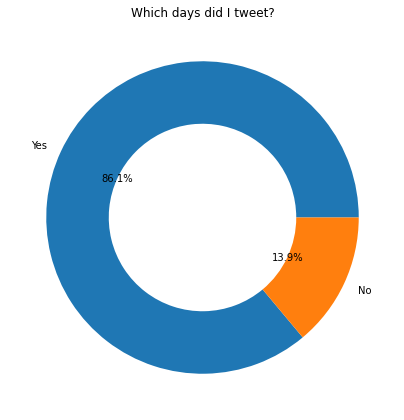

In [73]:
outcome = grand.tweeted.value_counts()
size()
plt.pie(outcome, labels=["Yes","No"], autopct = '%1.1f%%', wedgeprops={'width':0.4})

plt.title("Which days did I tweet?");

> __Out of the 273 days, I tweeted for 86.1% of them i.e 235 days__

> __Didn't tweet for 38 days__

### 2. Tweets Published

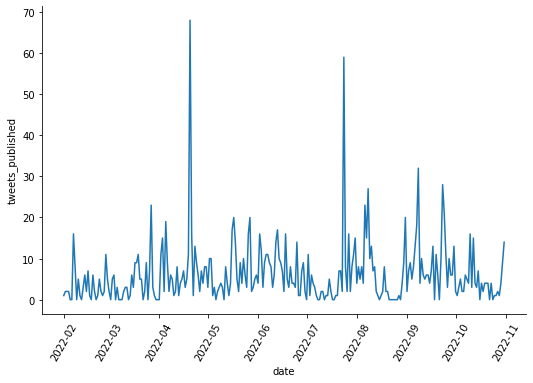

In [74]:
# size(18, 12)
sns.relplot(data=grand, x ="date",y="tweets_published", kind="line", height=5, aspect=1.5);
plt.xticks(rotation=60);

> * __Published the highest number of tweets in April followed by in the month of July__

### 3. Impressions

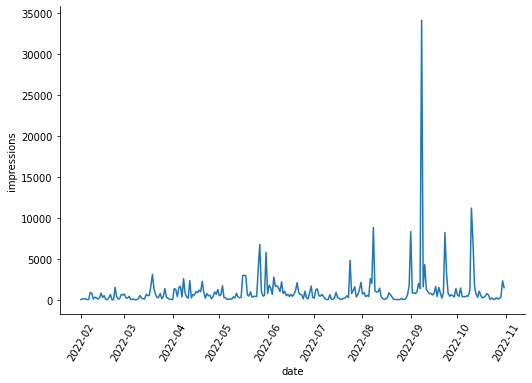

In [75]:
sns.relplot(data=grand, x ="date",y="impressions", kind="line", height=5, aspect=1.5);
plt.xticks(rotation=60);

> * __Got the highest number of impressions totalling 35,000 in the month of September.__

### 4. Engagements

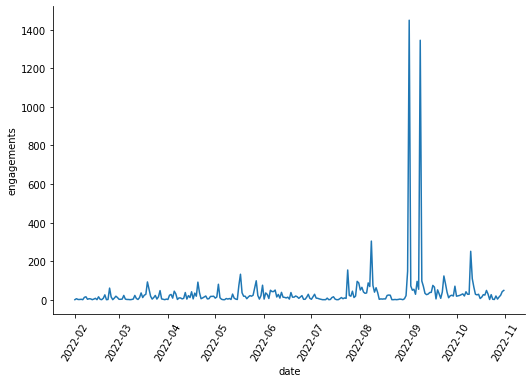

In [76]:
sns.relplot(data=grand, x ="date",y="engagements", kind="line", height=5, aspect=1.5);
plt.xticks(rotation=60);

### 5. Retweets

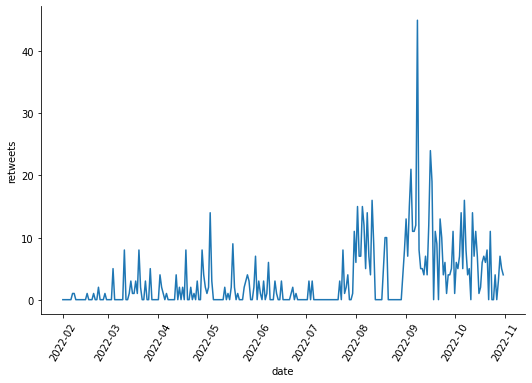

In [77]:
sns.relplot(data=grand, x ="date",y="retweets", kind="line", height=5, aspect=1.5);
plt.xticks(rotation=60);

### 6. Replies

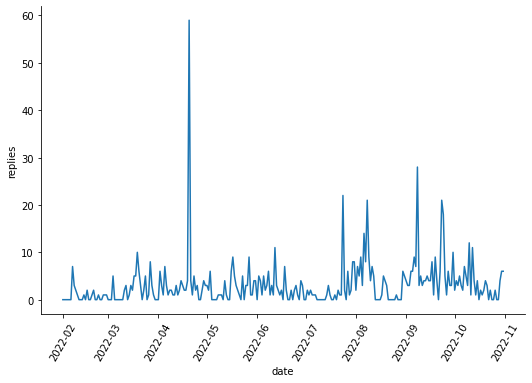

In [78]:
sns.relplot(data=grand, x ="date",y="replies", kind="line", height=5, aspect=1.5);
plt.xticks(rotation=60);

### 7. Likes

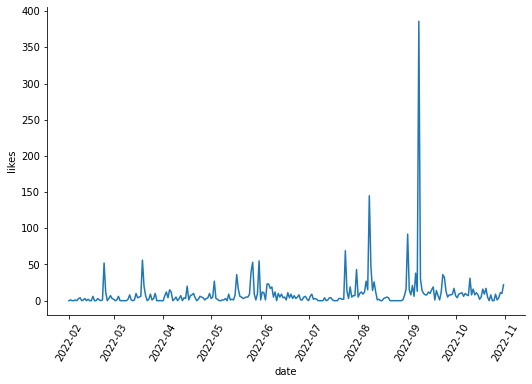

In [79]:
sns.relplot(data=grand, x ="date",y="likes", kind="line", height=5, aspect=1.5);
plt.xticks(rotation=60);

## 1️⃣ What is the average number of tweets I made?

> * __Averge Number of tweets per day__

In [80]:
grand.columns

Index(['date', 'tweets_published', 'impressions', 'engagements', 'retweets',
       'replies', 'likes', 'day', 'month', 'tweeted'],
      dtype='object')

In [81]:
grand.tweets_published.mean()

6.106227106227106

> * __Averge Number of tweets per month__

In [113]:
monthly_average = grand.groupby("month")[['month','tweets_published']].mean()
monthly_average

,tweets_published
month,
February,3.250000
March,3.806452
April,8.600000
May,6.387097
June,7.600000
July,5.741935
August,5.935484
September,9.333333


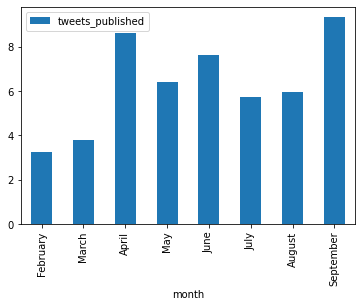

In [117]:
monthly_average.plot(kind="bar");

## 2️⃣ What day of the week did i make the most tweets

<AxesSubplot:xlabel='day'>

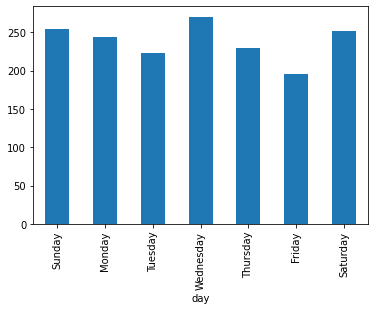

In [129]:
grand.groupby('day')['tweets_published'].sum().plot(kind='bar');
plt.title()

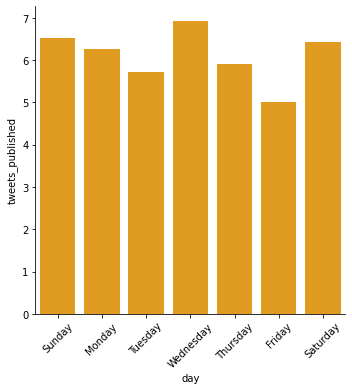

In [123]:
sns.catplot(data=grand, x='day', y='tweets_published', kind='bar', ci=None, color='orange')
plt.xticks(rotation=45);

## 2️⃣ What Month did I have the most tweet impressions?

In [128]:
grand.groupby('month')['impressions'].sum()

month
February      9177
March        15268
April        26877
May          36790
June         30310
July         21211
August       26559
September    81200
Name: impressions, dtype: int64

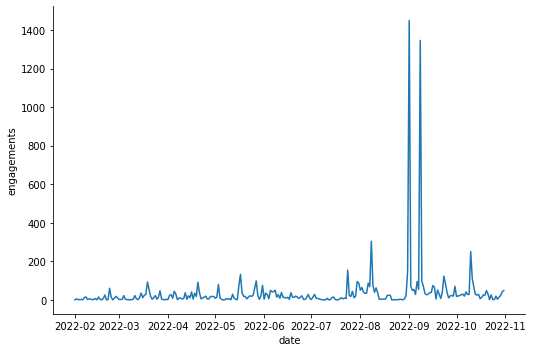

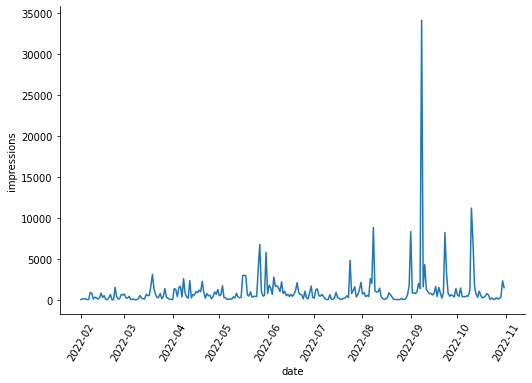

In [125]:
sns.relplot(data=grand, x ="date",y="engagements", kind="line", height=5, aspect=1.5);
sns.relplot(data=grand, x ="date",y="impressions", kind="line", height=5, aspect=1.5,);
plt.xticks(rotation=60);